In [9]:
using Pkg
Pkg.activate(@__DIR__)
push!(LOAD_PATH, joinpath(@__DIR__, "..", ".."));

In [12]:
using JuMP
using BARON
using LinearAlgebra
using Parameters
using MINLPTrajOpt

The optimizer is clearly exploiting numerical issues due to the primitive integration scheme, injecting energy by searching for instability.

TODO:

* Running state cost
* AxisArrays for sanity
* Better discretization of the continuous time dynamics
* Think about better integration schemes
  * Central differencing for accelerations
  * Semi-implicit Euler
  * Energy flow constraints
  * Variable time steps
* Keep track of total energy
* Switch to PGFPlotsX.jl
* Compare to COUENNE

In [17]:
solver = BaronSolver(threads=Sys.CPU_THREADS)
parameters = PendulumParameters()
τmax = parameters.m * parameters.g * parameters.l * 0.7
θ0 = -0.1
θd0 = 0.0
T = 8.0 #4.5 #4.5
N = 40
Δt = T / N
problem = PendulumSwingUpProblem(parameters, (θ0, θd0), solver;
    τmax = τmax, Δt=Δt, N=N);

In [18]:
status = solve(problem.model)
@assert status == :Optimal

 BARON version 18.8.23. Built: LNX-64 Thu Aug 23 14:46:44 EDT 2018

 BARON is a product of The Optimization Firm.
 For information on BARON, see https://minlp.com/about-baron
 Licensee: MIT at Twan Koolen, tkoolen@mit.edu.

 If you use this software, please cite publications from
 https://minlp.com/baron-publications, such as: 

 Khajavirad, A. and N. V. Sahinidis,
 A hybrid LP/NLP paradigm for global optimization relaxations,
 Mathematical Programming Computation, 10, 383-421, 2018.
 This BARON run may utilize the following subsolver(s)
 For LP/MIP: ILOG CPLEX                                      
 For NLP: IPOPT, FILTERSD, FILTERSQP
 Doing local search
 Unable to find/load CPLEX library libcplex.so: cannot open shared object file: No such file or directory
 Using CPLEX library libcplex1280.so.
 Preprocessing found feasible solution with value  2015.84311624     
 Solving bounding LP
 Starting multi-start local search
 Preprocessing found feasible solution with value  1922.29829780   

:Optimal

In [23]:
using Plots
pyplot()

Plots.PyPlotBackend()

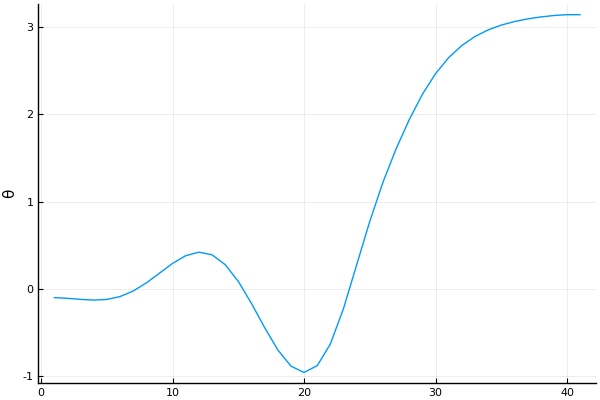

In [25]:
Δθ = atan.(getvalue.(problem.sΔθ) ./ getvalue.(problem.cΔθ))
θ = θ0 .+ [0.; cumsum(Δθ)]
plot(θ, ylabel="θ", legend=nothing)

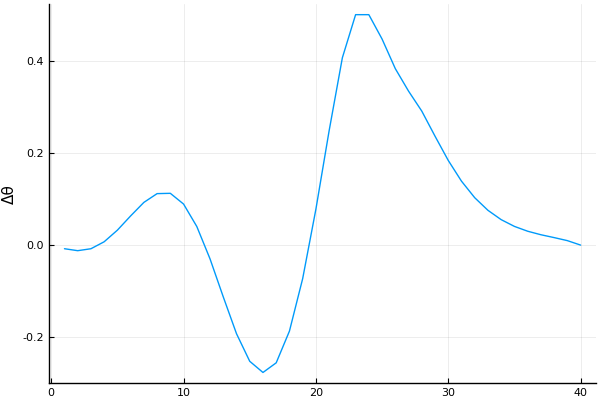

In [26]:
plot(Δθ, ylabel="Δθ", legend=nothing)

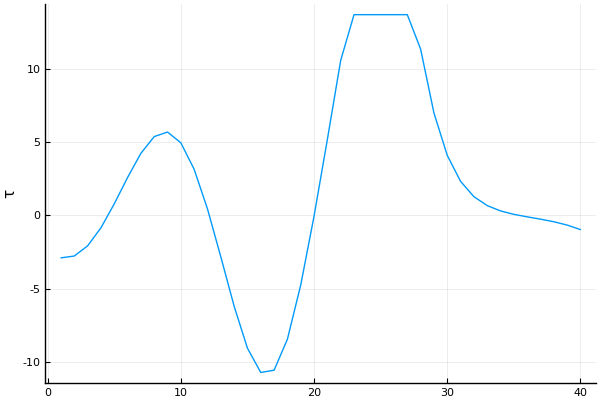

In [27]:
plot(getvalue.(problem.τ), ylabel="τ", legend=nothing)

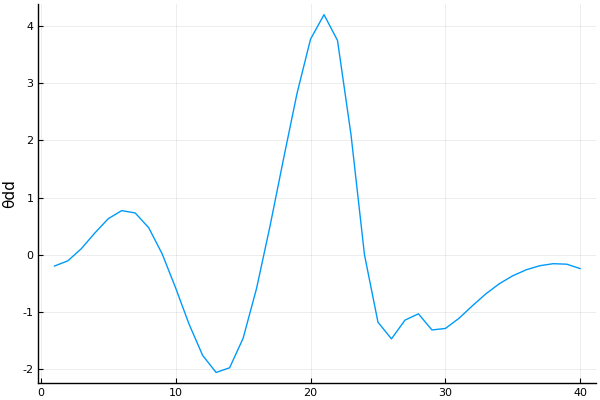

In [28]:
plot(getvalue.(problem.θdd), ylabel="θdd", legend=nothing)